In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# ----- Load Data -----
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# ----- Custom Gradient Boosting -----
def custom_gradient_boost(X, y, n_estimators=100, lr=0.1, max_depth=3):
    models = []
    y_pred = np.zeros_like(y, dtype=np.float64)

    for i in range(n_estimators):
        residual = y - y_pred
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        tree.fit(X, residual)
        update = lr * tree.predict(X)
        y_pred += update
        models.append(tree)
        if i % 10 == 0:
            print(f"Iteration {i+1}, MSE: {mean_squared_error(y, y_pred):.4f}")
    return y_pred, models

In [5]:
# ----- Train Model -----
y_train_pred, models = custom_gradient_boost(X_train, y_train, n_estimators=100, lr=0.1, max_depth=4)


Iteration 1, MSE: 4.6646
Iteration 11, MSE: 0.9658
Iteration 21, MSE: 0.4308
Iteration 31, MSE: 0.3191
Iteration 41, MSE: 0.2760
Iteration 51, MSE: 0.2554
Iteration 61, MSE: 0.2446
Iteration 71, MSE: 0.2345
Iteration 81, MSE: 0.2265
Iteration 91, MSE: 0.2187


In [12]:
# ----- Predict on Test Set -----
y_test_pred = np.zeros_like(y_test)
for model in models:
    y_test_pred += 0.1 * model.predict(X_test)

In [13]:
# Evaluation
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("📊 Gradient Boosting Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

📊 Gradient Boosting Evaluation:
Mean Absolute Error (MAE): 0.34
Root Mean Squared Error (RMSE): 0.51
R² Score: 0.8016


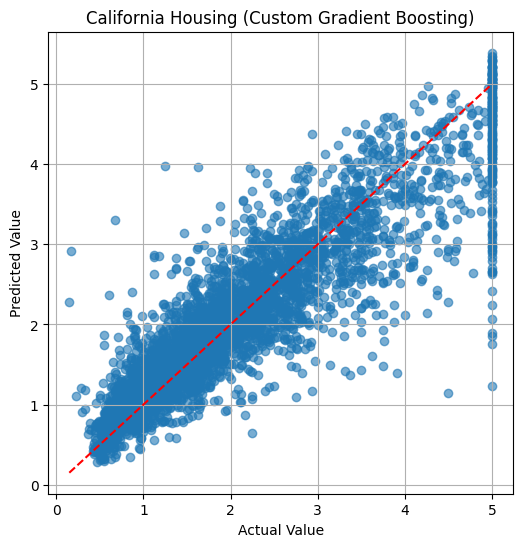

In [8]:
# ----- Visualization -----
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('California Housing (Custom Gradient Boosting)')
plt.grid(True)
plt.show()